In [1]:
import pandas as pd
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
from contextlib import closing

In [2]:
def make_df(league: int) -> pd.DataFrame:
    dic = {'id_match':[],
           'id_home_team':[], 
           'id_visiting_team':[],
           'goal_home_team':[],
           'goal_visiting_team':[]}

    with sqlite3.connect('matches.db') as conn:
        with closing(conn.cursor()) as cursor:
            cursor.execute(f'SELECT * FROM Matches WHERE fk_id_league = {league};')
            result = cursor.fetchall()
            for match in result:
                dic['id_match'].append(match[0])
                dic['id_home_team'].append(match[3])
                dic['id_visiting_team'].append(match[4])
                dic['goal_home_team'].append(match[5])
                dic['goal_visiting_team'].append(match[6])
    return pd.DataFrame(data=dic)

def mean_goals(df: pd.DataFrame) -> float:
    goals = df['goal_home_team'].sum() + df['goal_visiting_team'].sum()
    matches = (df.shape)[0]
    return round(goals/matches, 2)

def outcomes(df: pd.DataFrame) -> list:
    matches = (df.shape)[0]
    home = 0
    draw = 0
    away = 0
    for i in range(matches):
        if df['goal_home_team'][i] > df['goal_visiting_team'][i]:
            home += 1
        elif df['goal_home_team'][i] < df['goal_visiting_team'][i]:
            away += 1
        else:
            draw += 1
    return [home, draw, away]

def over_under(df: pd.DataFrame) -> list:
    matches = (df.shape)[0]
    over = 0
    under = 0
    for i in range(matches):
        if (df['goal_home_team'][i] + df['goal_visiting_team'][i]) > 2.5:
            over += 1
        else:
            under += 1
    return [over, under]

def goals_sum(lista: list, labels: list) -> pd.DataFrame:
    df = pd.DataFrame()
    for j,i in enumerate(lista):
        df[labels[j]] = i['goal_home_team'] + i['goal_visiting_team']
    return df

def get_mean_odds(id_match: int) -> tuple:
    odd_home_mean = 0
    odd_draw_mean = 0
    odd_visiting_mean = 0
    cont = 0
    with sqlite3.connect('matches.db') as conn:
        with closing(conn.cursor()) as cursor:
            cursor.execute(f'SELECT * FROM Odds_1x2 WHERE fk_id_match = {id_match};')
            result = cursor.fetchall()
            for odd in result:
                odd_home_mean += float(odd[2])
                odd_draw_mean += float(odd[3])
                odd_visiting_mean += float(odd[4])
                cont += 1
            odd_home_mean = odd_home_mean/cont
            odd_draw_mean = odd_draw_mean/cont
            odd_visiting_mean = odd_visiting_mean/cont
    return (odd_home_mean, odd_draw_mean, odd_visiting_mean)

def mean_odds(df: pd.DataFrame()) -> list:
    matches = (df.shape)[0]
    dic = {'home':[],
           'draw':[],
           'visiting':[]}
    for i in range(matches):
        home, draw, visiting = get_mean_odds(df['id_match'][i])
        dic['home'].append(home)
        dic['draw'].append(draw)
        dic['visiting'].append(visiting)
    df_result = pd.DataFrame(data=dic)
    return [round(df_result['home'].mean(),2),
            round(df_result['draw'].mean(),2),
            round(df_result['visiting'].mean(),2)]

In [3]:
df_premier_league = make_df(1)
df_italiano = make_df(2)
df_bundesliga = make_df(3)
df_laliga = make_df(4)
df_ligue1 = make_df(5)
df_brasileiro = make_df(6)

In [4]:
pl_mean = mean_goals(df_premier_league)
si_mean = mean_goals(df_italiano)
b_mean = mean_goals(df_bundesliga)
ll_mean = mean_goals(df_laliga)
l1_mean = mean_goals(df_ligue1)
br_mean = mean_goals(df_brasileiro)

dic = {'League':['Premier League', 'Serie A (Italy)', 'Bundesliga', 'LaLiga',
       'Ligue 1', 'Série A (Brazil)'],
       'Mean goals':[pl_mean, si_mean, b_mean, ll_mean, l1_mean, br_mean]}

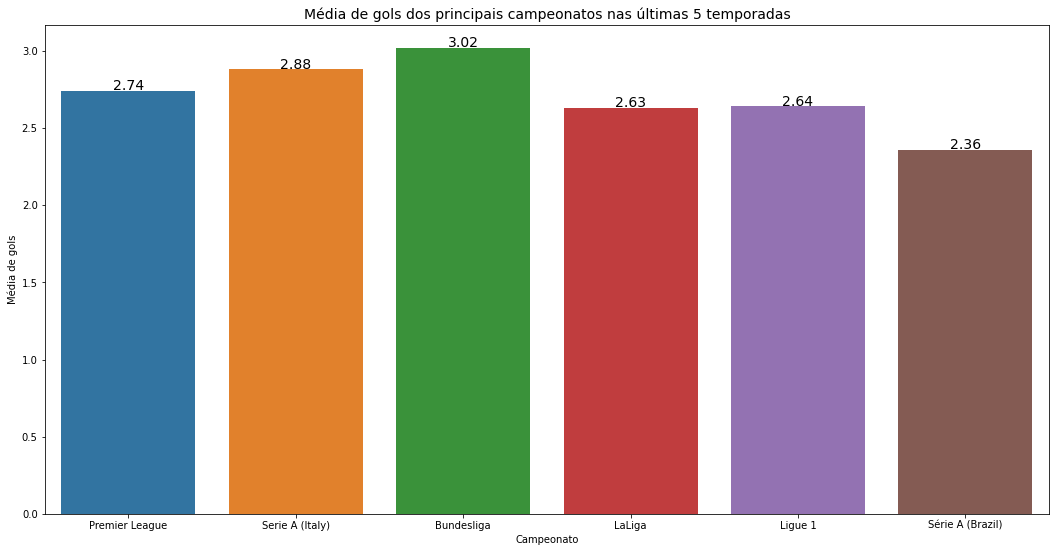

In [5]:
plt.figure(figsize=(18,9))
plt.xlabel('Campeonato')
plt.ylabel('Média de gols')
plt.title('Média de gols dos principais campeonatos nas últimas 5 temporadas',size=14)
plot = sns.barplot(data=dic,x='League',y='Mean goals')
for i in plot.patches:
    plot.annotate(str(i.get_height()),(float(i.get_x()+i.get_width()/2),float(i.get_height())),
                    ha='center',va='baseline', fontsize=14,xytext=(0,1),textcoords='offset points')

In [6]:
labels = ['Home','Draws','Away']
pl = outcomes(df_premier_league)
b = outcomes(df_bundesliga)
si = outcomes(df_italiano)
ll = outcomes(df_laliga)
l1 = outcomes(df_ligue1)
br = outcomes(df_brasileiro)

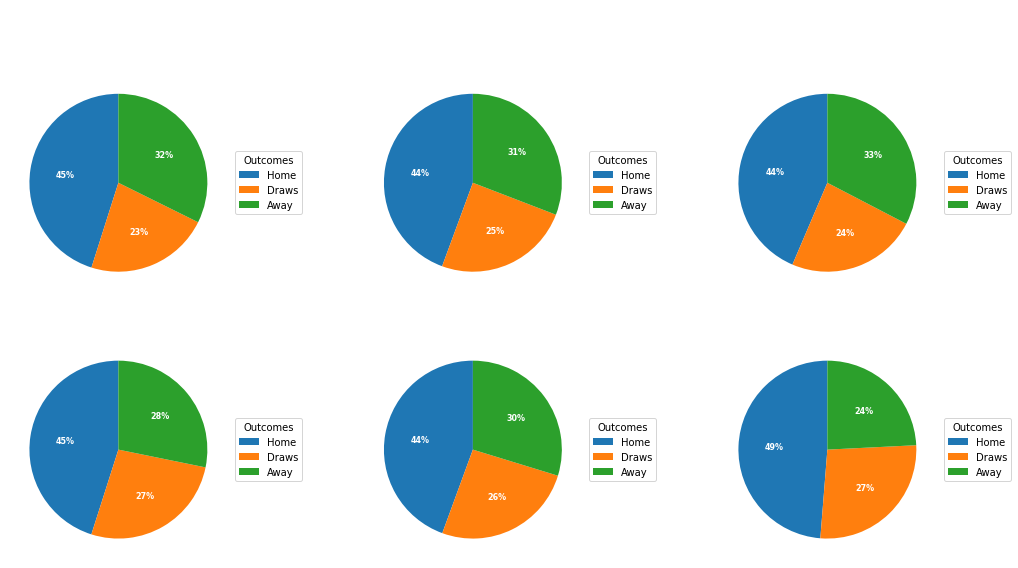

In [7]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,9))
fig.suptitle('Resultados das principais ligas nas últimas 5 temporadas',color='w',weight='bold',size='14')
wedges, texts, autotexts = ax[0,0].pie(pl,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[0,0].legend(wedges, labels, title='Outcomes', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[0,0].set_title('Premier League',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[0,1].pie(b,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[0,1].legend(wedges, labels, title='Outcomes', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[0,1].set_title('Bundesliga',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[0,2].pie(si,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[0,2].legend(wedges, labels, title='Outcomes', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[0,2].set_title('Serie A (Italy)',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[1,0].pie(ll,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[1,0].legend(wedges, labels, title='Outcomes', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[1,0].set_title('LaLiga',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[1,1].pie(l1,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[1,1].legend(wedges, labels, title='Outcomes', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[1,1].set_title('Ligue 1',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[1,2].pie(br,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[1,2].legend(wedges, labels, title='Outcomes', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[1,2].set_title('Série A (Brazil)',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

plt.show()

In [8]:
labels = ['Over','Under']
pl = over_under(df_premier_league)
b = over_under(df_bundesliga)
si = over_under(df_italiano)
ll = over_under(df_laliga)
l1 = over_under(df_ligue1)
br = over_under(df_brasileiro)

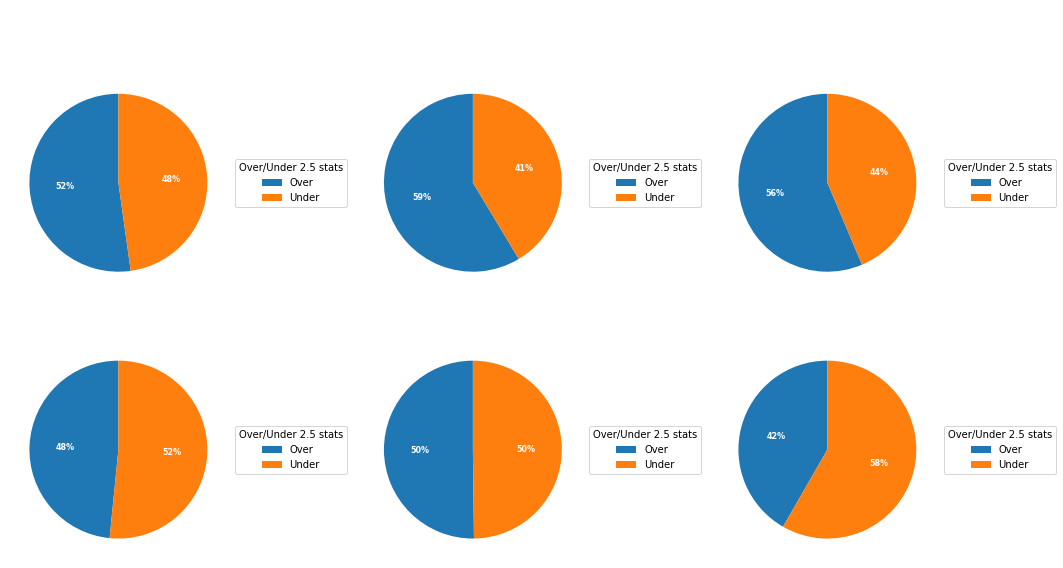

In [9]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18,9))
fig.suptitle('Proporção dos jogos que ficaram abaixo ou acima de 2.5 gols no total',color='w',weight='bold',size='14')
wedges, texts, autotexts = ax[0,0].pie(pl,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[0,0].legend(wedges, labels, title='Over/Under 2.5 stats', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[0,0].set_title('Premier League',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[0,1].pie(b,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[0,1].legend(wedges, labels, title='Over/Under 2.5 stats', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[0,1].set_title('Bundesliga',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[0,2].pie(si,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[0,2].legend(wedges, labels, title='Over/Under 2.5 stats', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[0,2].set_title('Serie A (Italy)',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[1,0].pie(ll,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[1,0].legend(wedges, labels, title='Over/Under 2.5 stats', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[1,0].set_title('LaLiga',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[1,1].pie(l1,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[1,1].legend(wedges, labels, title='Over/Under 2.5 stats', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[1,1].set_title('Ligue 1',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

wedges, texts, autotexts = ax[1,2].pie(br,autopct='%1.f%%', textprops=dict(color='w'),startangle=90)
ax[1,2].legend(wedges, labels, title='Over/Under 2.5 stats', loc='center left', bbox_to_anchor=(1,0,0.5,1))
ax[1,2].set_title('Série A (Brazil)',color='w',weight='bold')
plt.setp(autotexts, size=8, weight='bold')

plt.show()

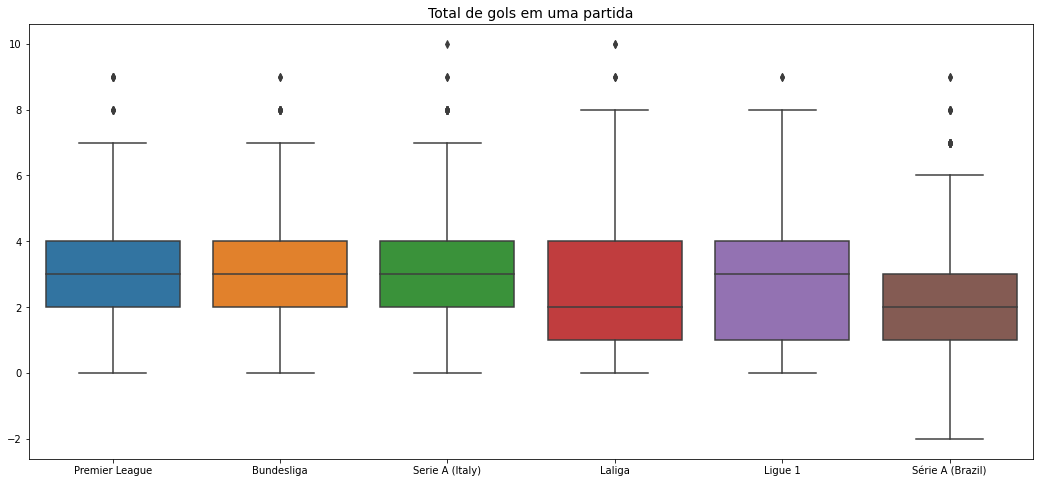

In [10]:
labels = ['Premier League','Bundesliga','Serie A (Italy)','Laliga','Ligue 1','Série A (Brazil)']
df = goals_sum([df_premier_league,df_bundesliga,df_italiano,df_laliga,df_ligue1,df_brasileiro],
                labels)
fig, ax = plt.subplots(figsize=(18,8))
sns.boxplot(data=df[labels])
plt.title('Total de gols em uma partida',size=14)
plt.show()

In [11]:
pl_mean = mean_odds(df_premier_league)
si_mean = mean_odds(df_italiano)
b_mean= mean_odds(df_bundesliga)
ll_mean = mean_odds(df_laliga)
l1_mean = mean_odds(df_ligue1)
br_mean = mean_odds(df_brasileiro)

dic_home = {'League':['Premier League', 'Serie A (Italy)', 'Bundesliga', 'LaLiga',
       'Ligue 1', 'Série A (Brazil)'],
       'Mean Odds home':[pl_mean[0], si_mean[0], b_mean[0], ll_mean[0], l1_mean[0], br_mean[0]]}

dic_draw = {'League':['Premier League', 'Serie A (Italy)', 'Bundesliga', 'LaLiga',
       'Ligue 1', 'Série A (Brazil)'],
       'Mean Odds draw':[pl_mean[1], si_mean[1], b_mean[1], ll_mean[1], l1_mean[1], br_mean[1]]}

dic_visiting = {'League':['Premier League', 'Serie A (Italy)', 'Bundesliga', 'LaLiga',
       'Ligue 1', 'Série A (Brazil)'],
       'Mean Odds visiting':[pl_mean[2], si_mean[2], b_mean[2], ll_mean[2], l1_mean[2], br_mean[2]]}

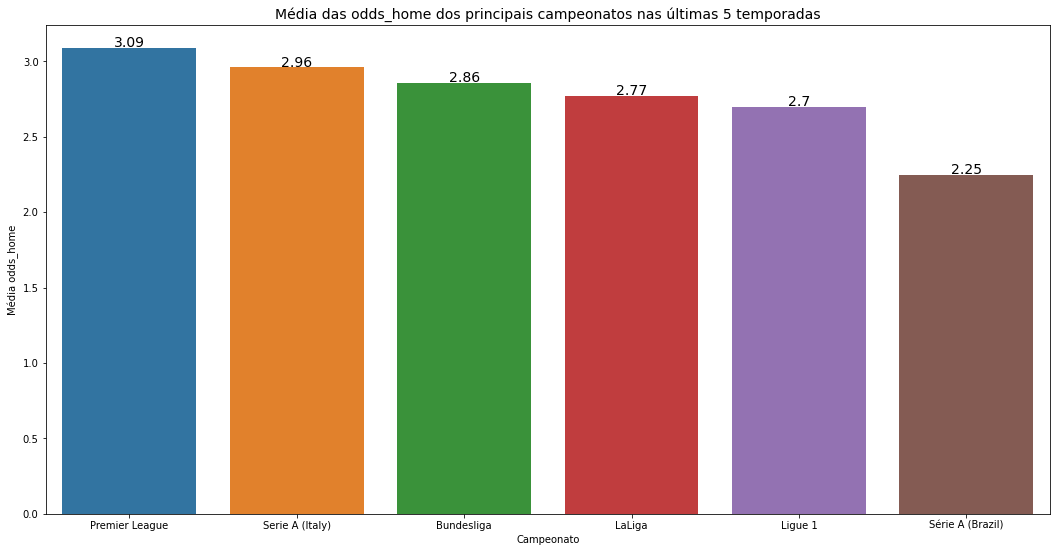

In [12]:
plt.figure(figsize=(18,9))
plt.xlabel('Campeonato')
plt.ylabel('Média odds_home')
plt.title('Média das odds_home dos principais campeonatos nas últimas 5 temporadas',size=14)
plot = sns.barplot(data=dic_home,x='League',y='Mean Odds home')
for i in plot.patches:
    plot.annotate(str(i.get_height()),(float(i.get_x()+i.get_width()/2),float(i.get_height())),
                    ha='center',va='baseline', fontsize=14,xytext=(0,1),textcoords='offset points')

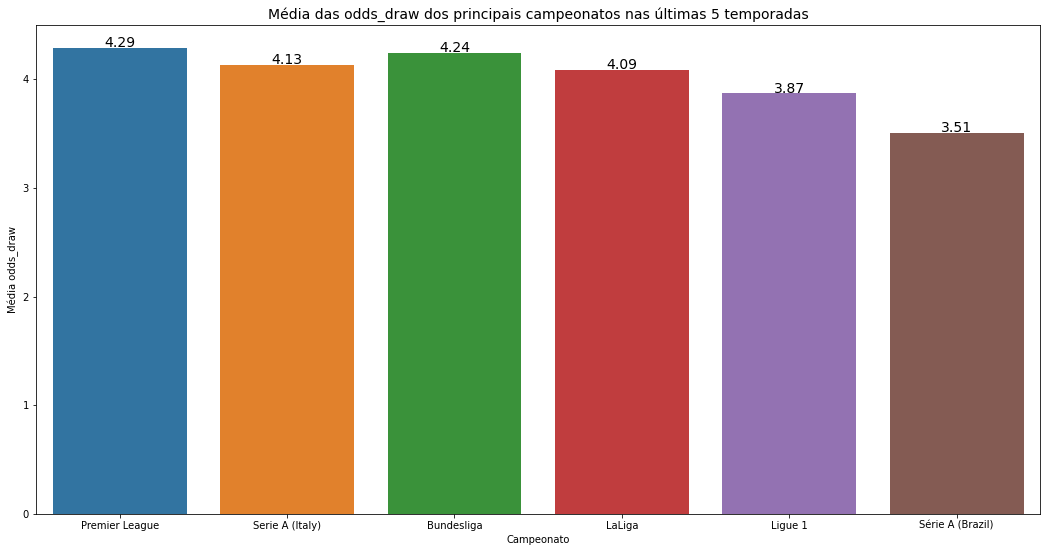

In [13]:
plt.figure(figsize=(18,9))
plt.xlabel('Campeonato')
plt.ylabel('Média odds_draw')
plt.title('Média das odds_draw dos principais campeonatos nas últimas 5 temporadas',size=14)
plot = sns.barplot(data=dic_draw,x='League',y='Mean Odds draw')
for i in plot.patches:
    plot.annotate(str(i.get_height()),(float(i.get_x()+i.get_width()/2),float(i.get_height())),
                    ha='center',va='baseline', fontsize=14,xytext=(0,1),textcoords='offset points')

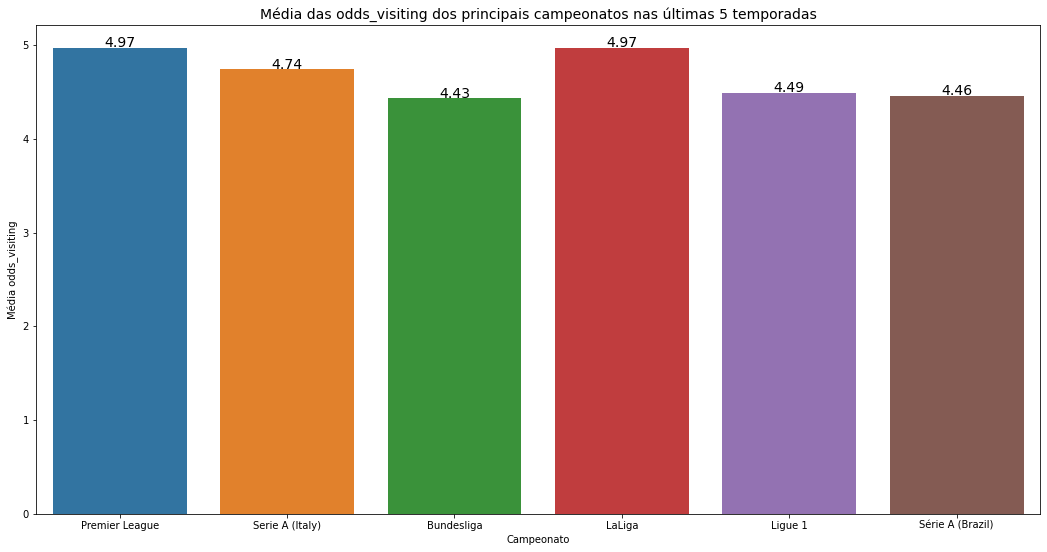

In [14]:
plt.figure(figsize=(18,9))
plt.xlabel('Campeonato')
plt.ylabel('Média odds_visiting')
plt.title('Média das odds_visiting dos principais campeonatos nas últimas 5 temporadas',size=14)
plot = sns.barplot(data=dic_visiting,x='League',y='Mean Odds visiting')
for i in plot.patches:
    plot.annotate(str(i.get_height()),(float(i.get_x()+i.get_width()/2),float(i.get_height())),
                    ha='center',va='baseline', fontsize=14,xytext=(0,1),textcoords='offset points')